In [1]:
from read_ggp_run import *

In [2]:
# -------------------------------------------------- #
# Setup
# -------------------------------------------------- #

paramter_settings = {'mean_lambda': 'bound',
                    'gamma_lambda': 'bound',
                    'var_lambda': 'bound',
                    'mean_q': 'bound',
                    'gamma_q': 'bound',
                    'var_q':'bound',
                    'beta':'bound',
                    'var_x':'bound',
                    'var_g':'bound',
                    'var_dx':'bound',
                    'var_dg':'bound'} 

directory = '../data/var_dg/var_dg_1'
sample = 'var_dg_1'

filebase = default_filebase(directory, sample) # default
save_plots = True
# -------------------------------------------------- #


In [3]:
dat_file = get_data_file(directory, sample)

minimization_iter_file, minimization_final_file = get_minimization_file(filebase, paramter_settings)
scan_files = get_scan_files(filebase, paramter_settings)

prediction_file_f, prediction_file_b, prediction_file = get_prediction_files(filebase)

if save_plots:
    plot_file = filebase
else:
    plot_file = None 

## Paramter Scans
- 1D paramter scans 

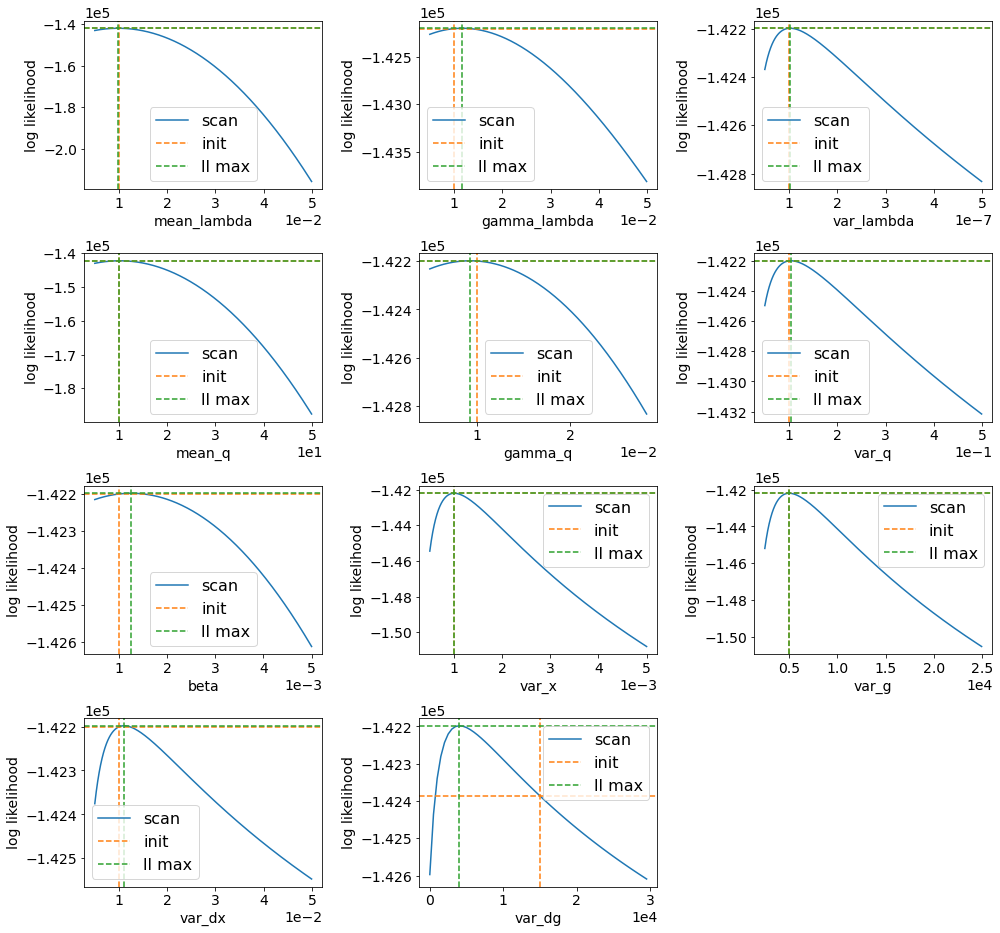

In [4]:
plot_1dscans(scan_files, plot_file)    


## Minimization
- plot the minimization process, ie the log likelihood for all iteration steps

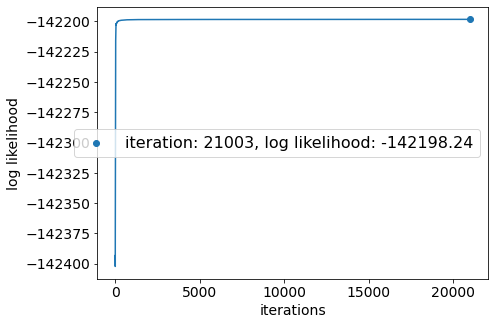

In [5]:

plot_minimization(minimization_iter_file, plot_file)

## Prediction
- plots the combined backward-forward prediction as well as both predictions seperately and the original data

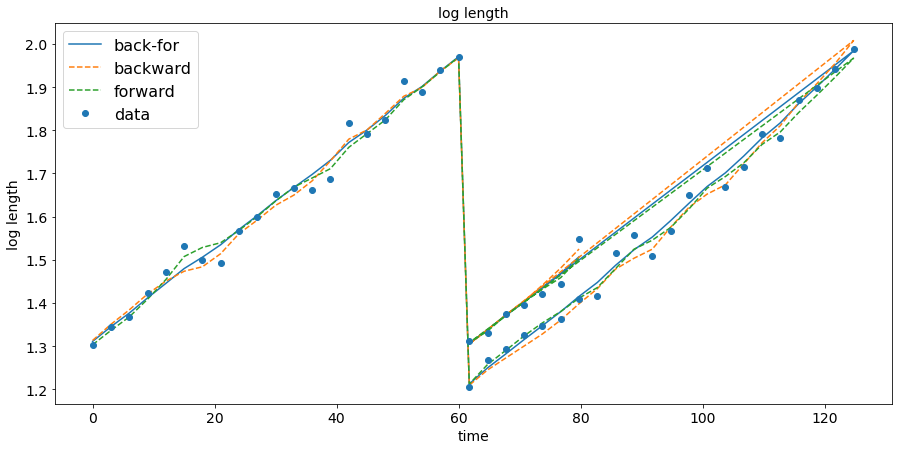

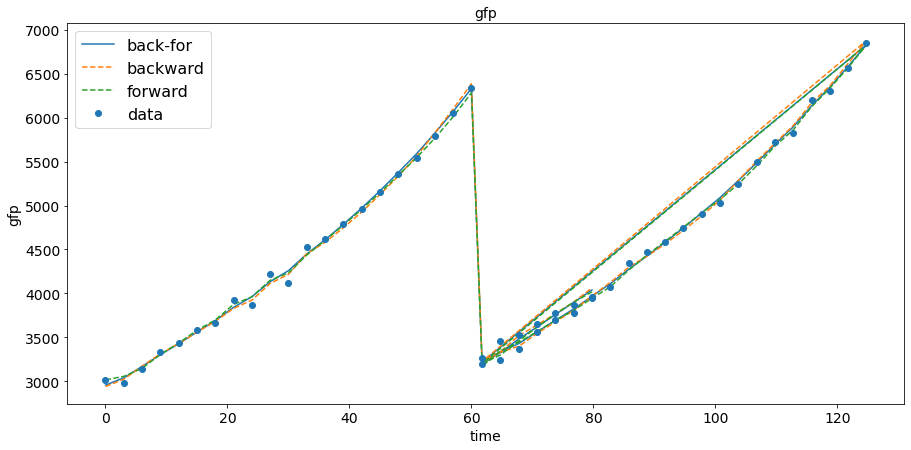

In [6]:
########################################################################
prediction = pd.read_csv(prediction_file, skiprows=13)
backward_prediction = pd.read_csv(prediction_file_b, skiprows=13)
forward_prediction = pd.read_csv(prediction_file_f, skiprows=13)

data_slice = slice(0, 50)

compare_predictions([prediction, backward_prediction, forward_prediction], ['back-for', 'backward', 'forward'], 'mean_x', prediction, 'log_length', data_slice, "log length", plot_file=plot_file)
compare_predictions([prediction, backward_prediction, forward_prediction], ['back-for', 'backward', 'forward'], 'mean_g', prediction, 'fp',data_slice, "gfp", plot_file=plot_file)


## Error estimation
- plot the error for a range of epsilons of the finit differnce estimation of the hessian, check if the estimation is numerically stable, ie close to constant for a range of epsilons

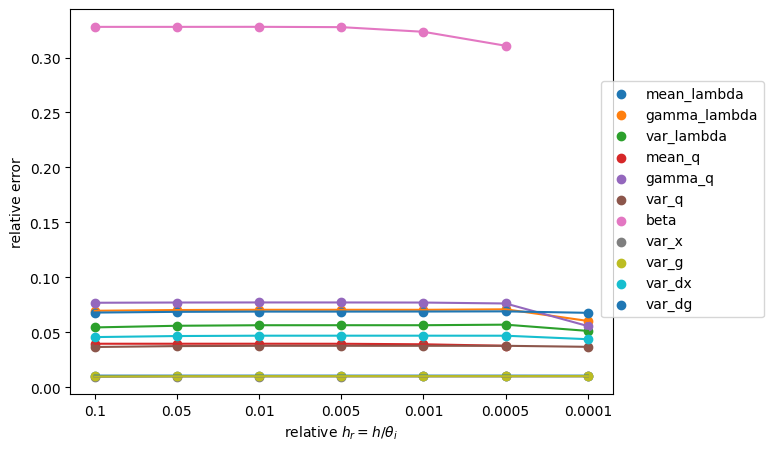

In [7]:
final_params = prediction = pd.read_csv(minimization_final_file, nrows=11)['final']
errors = prediction = pd.read_csv(minimization_final_file, skiprows=14)
    
plot_errors(errors, final_params, plot_file)

## Compare final and initial parameters

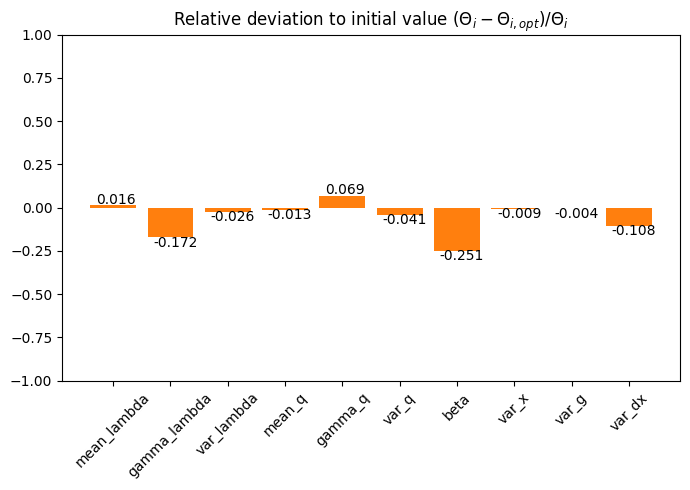

,parameter,simulation,minimization,relative deviation
0,mean_lambda,1.000000e-02,9.839010e-03,0.016099
1,gamma_lambda,1.000000e-02,1.171770e-02,-0.171770
2,var_lambda,1.000000e-07,1.026190e-07,-0.026190
3,mean_q,1.000000e+01,1.013450e+01,-0.013450
4,gamma_q,1.000000e-02,9.309290e-03,0.069071
5,var_q,1.000000e-01,1.040530e-01,-0.040530
6,beta,1.000000e-03,1.250980e-03,-0.250980
7,var_x,1.000000e-03,1.008670e-03,-0.008670
8,var_g,5.000000e+03,5.022100e+03,-0.004420
9,var_dx,1.000000e-02,1.107510e-02,-0.107510


In [9]:

compare_init_final(minimization_iter_file, plot_file, ["var_dg"])
